In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [ ]:
# Breast cancer dataset
iris = load_iris()

In [ ]:
X = pd.DataFrame(data=iris['data'], columns = iris['feature_names'])

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#Visualise PCA 

In [ ]:
X_visualize= X[['sepal length (cm)', 'sepal width (cm)']]

In [ ]:
X_visualize

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
sc= StandardScaler()
X_v_normalized= sc.fit_transform(X_visualize)

In [ ]:
X_v_normalized=pd.DataFrame(X_v_normalized,index= X_visualize.index, columns=X_visualize.columns)

In [ ]:
pca = PCA(n_components=2)
X_v_pca = pd.DataFrame(pca.fit_transform(X_v_normalized), index=X_visualize.index, columns=["PC1", "PC2"])

In [ ]:
Sigma= np.cov(X_v_normalized.T)
Sigma

array([[ 1.00671141, -0.11835884],
       [-0.11835884,  1.00671141]])

In [ ]:
U=pd.DataFrame(np.linalg.svd(Sigma)[0])

In [ ]:
pcaU= pd.DataFrame(np.linalg.svd(np.cov(X_v_pca.T))[0])

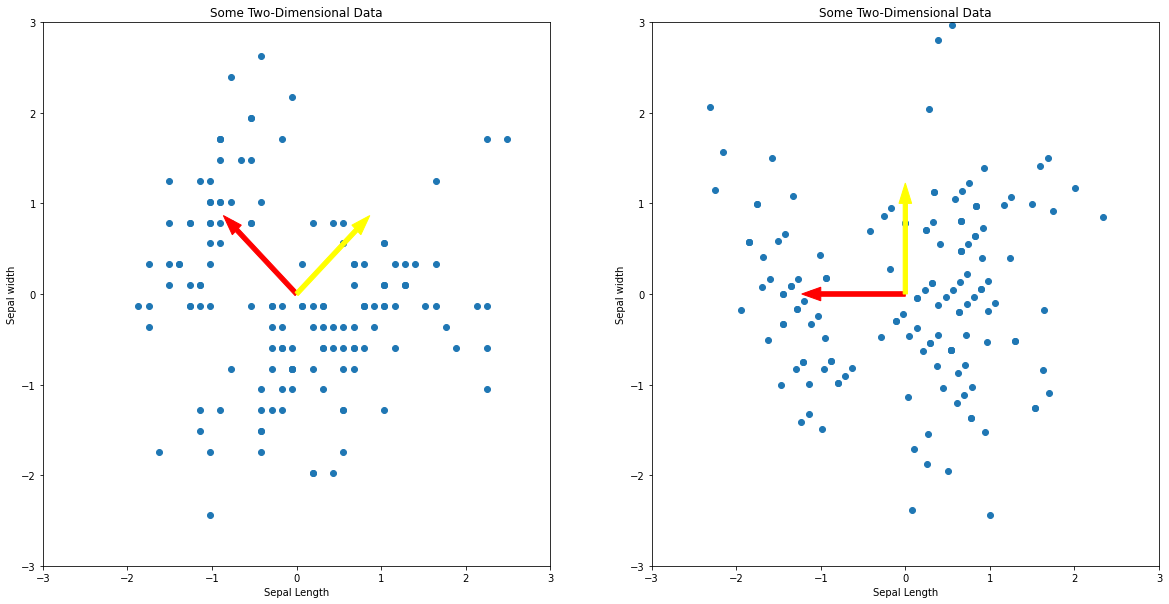

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(X_v_normalized['sepal length (cm)'], X_v_normalized['sepal width (cm)'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.title("Some Two-Dimensional Data")

plt.arrow(
    x=0,
    y=0,
    dx=U.iloc[0, 0],
    dy=U.iloc[1, 0],
    width=0.05,
    color='red',
    label="PC1"
)
plt.arrow(
    x=0,
    y=0,
    dx=U.iloc[0, 1],
    dy=U.iloc[1, 1],
    width=0.05,
    color='yellow',
    label="PC2"
)
plt.subplot(1, 2, 2)
plt.scatter(X_v_pca['PC1'], X_v_pca['PC2'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.title("Some Two-Dimensional Data")
plt.arrow(
    x=0,
    y=0,
    dx=pcaU.iloc[0, 0],
    dy=pcaU.iloc[1, 0],
    width=0.05,
    color='red',
    label="PC1"
)
plt.arrow(
    x=0,
    y=0,
    dx=pcaU.iloc[0, 1],
    dy=pcaU.iloc[1, 1],
    width=0.05,
    color='yellow',
    label="PC2"
)

plt.show()

# Applying PCA and checking for a suitable k number 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_normalized= sc.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA
pca= PCA().fit(X_normalized)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

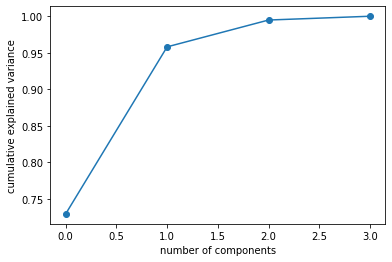

In [ ]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca= PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

In [ ]:
print(X_pca.shape, X.shape)

(150, 2) (150, 4)


# Clustering 

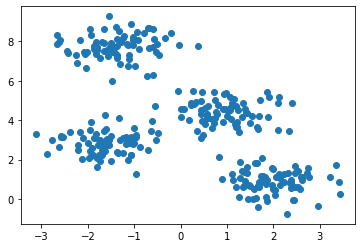

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1]);


Text(0, 0.5, 'inertia')

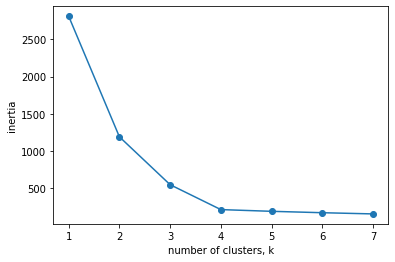

In [ ]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

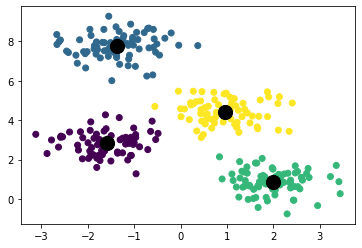

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c= y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);
